Holographic Reduced Representations (HRR)
========================================
Tutorial
--------

This is a tutorial for FZI implementation of HRR in Python.

Introduction
------------

First we will import the package.

In [2]:
from hrr import HRR

We can instantiate simple HRR representing number 5 using default constructor.

In [2]:
a = HRR(5)
print(a.memory)

[  1.13975241e-01  -7.65277458e-02  -3.93869992e-02  -2.33400347e-01
   1.28870531e-01   1.48340302e-01  -2.43157357e-02  -1.67713123e-01
  -1.63889972e-02  -5.61336188e-03  -2.56925027e-01  -1.89525137e-02
   1.94775037e-02  -3.86344307e-02  -1.85914802e-01  -8.68220436e-03
  -3.32358943e-02   5.00779971e-03   2.43145728e-01   2.34828609e-01
   1.99259769e-01  -4.54998401e-02  -1.40151736e-02   2.28843131e-01
   1.93312340e-01  -2.62616773e-01   2.90643027e-02   1.58533257e-01
  -1.42530903e-01   4.64905243e-03   1.50544270e-01   7.39404345e-02
   2.13654759e-04  -1.50748186e-01   2.49553754e-01  -2.60652309e-02
   1.48444444e-01  -1.98714931e-01   5.32926025e-03   8.05732069e-02
   2.21897969e-01   5.31208972e-02  -9.87797965e-02  -1.43465355e-01
   2.34916197e-01   1.38791366e-01   5.81620948e-02  -1.56420407e-01
   1.52603532e-01  -4.88301883e-02]


A randomly generated vector with entries being drawn from Gaussian distribution with mean=0 and stddev=1 is chosen to be unique representation of number 5. Instantiating new HRR with different number is going to generate new random, unique representation and store it globally (during runtime).

In [3]:
b = HRR(7)
print(b.memory)

[ 0.09639558  0.00177642 -0.02759382 -0.13209416 -0.02040249  0.20797966
 -0.16766582 -0.09105947  0.00202976  0.0614209  -0.01199971 -0.31121968
  0.04661899  0.04941539 -0.09649615  0.02017286  0.26584455  0.03488508
 -0.15077244  0.28754517  0.02460689 -0.13759132  0.05569837 -0.12435333
  0.01776047 -0.16755803 -0.0432739   0.1033084  -0.28210185  0.16932684
 -0.04162657  0.28431192  0.14279004  0.25922522 -0.01218799  0.13660786
 -0.15750979  0.08950717 -0.12668126  0.04151819 -0.04508286  0.26767718
  0.07388954  0.19476709 -0.01808308 -0.01769343 -0.04531211 -0.04177129
 -0.07755139 -0.21359849]


Instantiating another HRR with already seen value to be encoded reuses already determined representation for it:

In [4]:
a1 = HRR(5)
print(a1.memory == a.memory)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


Values of arbitrary types can be encoded and minipulated by in HRRs. For instance, we can encode string labels representing objects in the world the same way we encoded integers:

In [5]:
c = HRR("computer")
print(c.memory)

[-0.17710885 -0.04579422  0.06275717 -0.00853552 -0.04794097 -0.01741386
  0.27011449 -0.00202604 -0.11689175  0.09577662  0.141171   -0.14436141
 -0.08316206  0.19119923  0.12282934 -0.16638323  0.15688897  0.11387652
  0.15523608  0.17746627 -0.04524144  0.12731182 -0.0499686  -0.3642633
 -0.19493356 -0.00816241  0.10540955  0.10644555  0.18809549 -0.10403619
  0.12108112  0.09406455 -0.17253298 -0.01308533  0.1124809  -0.25271044
  0.00285885  0.26233407 -0.16698612  0.2359381   0.11379696 -0.01731307
 -0.25604016 -0.04073194  0.030779   -0.08380883  0.08621472 -0.02358994
 -0.03297457  0.06267089]


Encoded string "computer" and encoded number 5 have the same (default) length:

In [6]:
print(len(c.memory))
print(len(c.memory) == len(a.memory))

50
True


If needed, HRRs can be instantiated with specified memory size:

In [7]:
d = HRR(12, size=5)
print(len(c.memory) == len(d.memory))

False


We will clean the poluted kernel because it contains encodings of variable lenghts, so we can proceed with tutorial. In future it is going to destroy all current memory (something like memory flash from MIB when civilian sees aliens). We will also set the default size of the memory arrays to 20, for increased accuracy.

In [8]:
HRR.reset_kernel()
HRR.default_size = 200

Operations
----------

What makes HRR powerful are three basic operations on the representations they build:
1. binding (*)
2. superposition (+)
3. probing (/)

To **bind (associate)** two symbols together you can use ** * ** operator. In this example we will represent a concept of "blue rectangle" in the following way:

In [9]:
a, b = HRR("blue"), HRR("rectangle")
blue_rect = a * b
print(blue_rect.memory)

[ 0.03251637 -0.05448632 -0.0909093  -0.0188313   0.03266372 -0.1347405
  0.00491984 -0.05945178 -0.09199088  0.08381157 -0.04574972  0.01709158
  0.06906671 -0.12872477 -0.06645367  0.07254403 -0.01007704  0.06952036
  0.00904236  0.05928538 -0.00121068 -0.12480761 -0.03028589  0.2163495
  0.08248434  0.05882121  0.00920874  0.02084055  0.0347103  -0.02512502
 -0.1033254   0.03436798 -0.08495099  0.09589416 -0.07050423 -0.0067932
  0.05321092  0.04977742  0.03271184  0.11920203  0.08029745 -0.00661983
 -0.02587118 -0.02911626  0.01581361  0.03029673  0.12540055  0.00545638
  0.00215465 -0.05111031  0.00453617 -0.01509437  0.04486048  0.07809939
 -0.01699171 -0.03696959 -0.07193665  0.15227211 -0.00945303 -0.06713294
  0.04478813 -0.07625106 -0.01939521  0.00660417 -0.11889529  0.15725466
 -0.03050326 -0.01999501  0.09768188 -0.06643636  0.01699676  0.03728927
 -0.07214792  0.09994727 -0.06956185  0.00441036  0.04348144 -0.06732604
 -0.01239861  0.05092805 -0.15069996  0.01265315 -0.02

core.py:33: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if memory != None:


Result of operation is vector of the **same lenght** as each of the previously involved operands ("blue" and "rectangle"). Result of binding can be thought as a form of compression of two independent symbolic representations and two-way association between them.

This compound representation can be **probed** using ** / ** operator. If we probe resulting memory with "blue" we will get "rectangle" as a result.

In [10]:
probe_p = blue_rect / "blue"
print(probe_p)

rectangle


On the other hand, probing the memory with "rectangle" is going to return "blue" as a result:

In [11]:
probe_p = blue_rect / "rectangle"
print(probe_p)

blue


We can use **superposition** operator ** + ** to append a symbol to current memory. For example, memorizing "blue rectangle and red circle" in a single representation would look like this:

In [12]:
c, d = HRR("red"), HRR("circle")
red_circle = c * d
m = blue_rect + red_circle
print(m.memory)

[ 0.10792159 -0.01072924 -0.13878254 -0.04562944  0.0643692  -0.13476047
  0.05484574 -0.09265143 -0.05455214  0.03442348  0.05661828 -0.10090814
  0.13691242 -0.14185389 -0.02656175  0.16854922 -0.10222535  0.0618349
  0.00901084  0.03853181 -0.06119667 -0.10525494  0.08937178  0.20783247
  0.07278833  0.06165226 -0.01644419  0.0815716   0.04255617 -0.17291923
 -0.04920468  0.03196445 -0.0517281   0.19307666 -0.14827804 -0.00908304
  0.00968433 -0.06278281  0.10845571  0.1220737   0.26018108  0.01472043
 -0.08007242  0.10191045  0.00601229  0.07938119  0.0509044   0.08743248
 -0.06137112 -0.08415813 -0.11445838 -0.01660462  0.00615017  0.11442293
 -0.18563698 -0.12219684 -0.08369898  0.01951077  0.02321245 -0.22903163
  0.00696408 -0.1740938   0.02614014 -0.00199808 -0.07380306  0.18279484
  0.13761629 -0.15827204  0.10170305  0.07267936 -0.02096007  0.08165616
 -0.09516961  0.12577982  0.06811713  0.05057569 -0.01599139 -0.0973556
 -0.19804663  0.0830703  -0.2210898   0.03018423 -0.0

At this point we can probe the memory for any of the related symbols. Here are some examples of queries:

In [13]:
rectangle = m / "blue"
print(rectangle)

rectangle


In [14]:
blue = m / "rectangle"
print(blue)

blue


In [15]:
red = m / "circle"
print(red)

red


In [16]:
circle = m / "red"
print(circle)

circle


A single memory storage can be used for storing multiple information about a single object in key-value pairs (feature, value).

In [2]:
HRR.reset_kernel()
features = [ "color", "shape", "temperature", "position" ]
values = [ "blue", "square", 32.1, (114,46) ]
m = None
for i in range(len(features)):
    if m is None:
        m = HRR(features[i]) * values[i]
    else:
        new_item = HRR(features[i]) * values[i]
        m += new_item
print(m.memory)

[ 0.01344586  0.0525318   0.23292031  0.35068527 -0.503478    0.25462682
  0.18589297  0.19112231 -0.22373433  0.22969311 -0.007087    0.06388763
 -0.13797637  0.4820445   0.39294196  0.04929391 -0.11202267 -0.25203626
 -0.02191077 -0.23785965 -0.05438165 -0.21703881  0.05510503 -0.10438071
  0.41127508 -0.1566236  -0.32273128  0.03589589  0.3053564  -0.1511682
  0.35933479 -0.15703098 -0.00140794 -0.2854472  -0.26314812 -0.0020104
 -0.05876893  0.22269589  0.08277174 -0.14318654 -0.35492388 -0.17450583
  0.0355396  -0.12291885  0.35105565  0.19103157  0.36110116  0.62557283
  0.12772105  0.6540855 ]


core.py:33: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if memory != None:


In [5]:
features = [ "color", "shape", "temperature", "position" ]
values = [ "red", "circle", 2.2, (1,32) ]
m2 = None
for i in range(len(features)):
    if m2 is None:
        m2 = HRR(features[i]) * values[i]
    else:
        new_item = HRR(features[i]) * values[i]
        m2 += new_item
print(m2.memory)

[ 0.20466068  0.15656865 -0.07700905 -0.03969372 -0.29664375 -0.40669807
 -0.32759348 -0.05067364  0.09544957  0.20832112  0.28436851  0.56388514
  0.46657491 -0.16812666  0.19389374 -0.04698304 -0.63032959 -0.31677551
  0.3642275  -0.72809272 -0.14465321  0.19999369 -0.39073737  0.11932284
 -0.21261689  0.20277543 -0.59451544 -0.17522831  0.29746924  0.45659969
 -0.1997273  -0.45416939 -0.14762528 -0.08776478 -0.10130663 -0.21108861
 -0.04639088 -0.16295024 -0.53944366 -0.1213439  -0.20569918  0.08537121
  0.07021119  0.31002405 -0.42502743 -0.0761972   0.68598082 -0.10189733
 -0.43519052  0.18489572]


This single vector contains information about all of the parameters, which can be easily probed for every feature independently.

In [6]:
print(m / "color")
print(m / "shape")
print(m / "temperature")
print(m / "position")

blue
square
32.1
(114, 46)


Mapping
-------

The mechanics of HRRs can be used as potential solution for many different problems, depending on the semantics of information being passed in. In this example we will implement a simple was of representing spatial map of objects and their locations in 2D space: 

In [3]:
from hrr import HRR
HRR.reset_kernel()
features = [ "door", "tree", "car", "table", "computer" ]
values = [ (1,2), (4,3), (2,3), (2,1), (1,0) ]
m = None
for i in range(len(features)):
    if m is None:
        m = HRR(features[i]) * values[i]
    else:
        new_item = HRR(features[i]) * values[i]
        m += new_item
print(m.memory)

<type 'str'>
<type 'tuple'>
encoding coordinate!!!! wo
(1, 2)
(5, 5)
25
((1, 2), 0, 0)
((1, 2), 0, 1)
((1, 2), 1, 0)
((1, 2), 1, 1)
[[ 0.          0.90483742  0.92311635  0.          0.        ]
 [ 0.          0.98019867  1.          0.98019867  0.        ]
 [ 0.          0.          0.92311635  0.90483742  0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]
<type 'str'>
<type 'tuple'>
encoding coordinate!!!! wo
(4, 3)
(5, 5)
25
((4, 3), 0, 0)
((4, 3), 0, 1)
((4, 3), 1, 0)


hrr.py:126: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  enc = np.zeros(shape=(side_len, side_len), dtype=float)
hrr.py:36: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if memory != None:


IndexError: index 5 is out of bounds for axis 0 with size 5

### "Where is this object?"

As we know, we can probe this representation for object names and we will get respective locations in the map:

In [4]:
print(m / "car")
print(m / "computer")

(114, 46)
(1, 50)


### "What is on this location?"

We can querry spatial information about map by providing specific coordinaes of interest instead of object names:

In [10]:
print(m / (50,1))
print(m / (1,50))
print(m / (114,46))

table
computer
car


Semantic encoding example for strings
================


In [18]:
import numpy as np
HRR.reset_kernel()
HRR.default_size = 50

items = [ "door", "tree", "car", "table", "computer" ]
colors = [ "blue", "green", "red", "brown", "white" ]

m = None
for i in range(len(items)):
    if m is None:
        m = HRR(items[i]) * colors[i]
    else:
        new_item = HRR(items[i]) * colors[i]
        m += new_item
  
e = np.array(HRR.mapping["computer"])

# encode "PC" similarly to "computer"
e += np.random.uniform(-0.2,0.15, 50)
HRR.mapping["PC"] = np.array(e)

# encode "laptop" similarly to "PC"
e += np.random.uniform(-0.2,0.15, 50)
HRR.mapping["laptop"] = e

print(m / "PC")
print(m / "laptop")
print(m / "computer")

white
white
white


Serial memory
=============

Binding items with index gives ability of storing ordered lists:

In [11]:
HRR.reset_kernel()
items = [ "door", "tree", "car", "table", "computer" ]
m = None
for i in range(len(items)):
    if m is None:
        m = HRR(items[i]) * i
    else:
        new_item = HRR(items[i]) * i
        m += new_item
print(m.memory)

[-0.07657664  0.21751306  0.13719388  0.56211738 -0.08521719 -0.04905313
 -0.55145038  0.01649205 -0.29408373  0.34673499  0.1756631   0.34043089
 -0.13105342  0.26040072  0.1708475   0.12094029 -0.50998414 -0.21180933
 -0.50454653 -0.1037087  -0.16369129 -0.40401407  0.32497306  0.34915788
  0.34507793 -0.14328147 -0.25853187  0.03958084  0.85322718  0.1336401
  0.40805473 -0.2242996   0.09797664 -0.39100786  0.41790235 -0.36915619
 -0.45140208 -0.79442458  0.20543426 -0.40476572  0.11952552 -0.01193384
 -0.29627896  0.09001276 -0.60095758 -0.49708898  0.03956882 -0.03064929
 -0.01777879  0.44639181]


### "When was object seen?"

We can probe the memory for ordering information based on the object name:

In [12]:
print(m / "door")
print(m / "table")

0
3


### "What is the second element?"

We can querry ordering information about list by providing specific index of interest instead of object names:

In [13]:
print(m / 2)
print(m / 4)

car
computer


### Non-indexed serial recall

Instead of using explicit index, only ordering can be encoding using a single *wildcard* representation, successivly bound with itself and used as a placeholder item for every item of the list:

In [14]:
HRR.reset_kernel()
items = [ "door", "tree", "car", "table", "computer" ]
m = None
placeholder = HRR("HRRs are cool!")
for i in range(len(items)):
    if m is None:
        m = HRR(items[i]) * placeholder
    else:
        new_item = HRR(items[i]) * placeholder
        m += new_item
    placeholder += placeholder 
print(m.memory)

[-1.89699696  2.12368996  0.11761831 -3.52714276 -0.92376296  2.27468346
  2.74432212 -4.65182377 -1.37402872  1.93384066 -4.97288816  3.27498391
  3.94570423  1.8645443   2.15839109  1.04106435 -1.07055158  0.11708291
 -0.72896296  0.65304207  2.55141279  1.3710693   1.14979436  3.11047681
  5.18688357  0.67501832 -3.16107258 -1.28228086 -1.79172265  2.84680373
  1.74323849 -0.1110923   3.18715513  2.4172938  -2.93556984 -2.34133207
  1.12178507 -1.37288495 -0.91120474 -0.37564659  1.15904508  0.65685147
  2.39171634  2.58333296  1.22148116  0.55425672 -2.92109199  0.54251322
  1.15578156 -5.11460485]


In order to recall the items from the list, we need to know the number of elements in the memory and *pick* the same starting placeholder item:

Triplets
=====

Binding works not only with pairs, but with triplets as well. There is a two-way unbinding process for reaching the original single data point. In the example bellow we bind triplet (5, "color", "blue") and link it with triplet (5, "name", "sky"). Querying that HRR gives equally probable pairs ("color", "blue") and ("name", "sky"), which do not have to be cleaned. For this we use another operator **%**, to get raw unbinding data and process it further.

We probe the noisy result of previous probing with "name" to finally extract "sky":

In [15]:
HRR.reset_kernel()
HRR.default_size = 40
w = HRR(5) * HRR("color") * HRR("blue") + HRR(5) * HRR("name") * HRR("sky")

t = w % 5
print(t)
u = HRR('t', memory = t) / "name"
print(u)

<core.HRR instance at 0x7f6e77302290>


AttributeError: HRR instance has no attribute '__float__'

Selective (intentional) forgetting
----------------------------------

Superposition (+) link two representations into single one, allowing effect of appending. Complementary operation is **subtraction (-)**, which can be used to forget or delete representations from memory.

In [16]:
HRR.reset_kernel()
HRR.default_size = 40
w = HRR(5) * HRR("color") * HRR("blue") + \
HRR(5) * HRR("name") * HRR("sky") + \
HRR(4) * HRR("name") * HRR("car") + \
HRR(5) * HRR("name") * HRR("earth")

t = w % 5
u = HRR('t', memory = t) / "name"
print('Before forgeting: {}'.format(u))

to_sub = HRR(5) * HRR("name") * HRR("sky")
w -= to_sub

t = w % 5
u = HRR('t', memory = t) / "name"
print('After forgeting: {}'.format(u))

AttributeError: HRR instance has no attribute '__float__'

Playing around with gaussian

In [12]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
x = [0] * 10
for i in range (0,10):
    x[i] = gaussian(i,5,0.99)
print(x)

[2.8913106903228875e-06, 0.00028516790670049768, 0.010138976449967543, 0.12994966429806148, 0.60040429522850536, 1.0, 0.60040429522850536, 0.12994966429806148, 0.010138976449967543, 0.00028516790670049768]


Semantic encoding example for strings
================

Subtitle
------

Paragraph

In [11]:
import numpy as np
HRR.reset_kernel()
HRR.default_size = 50

items = [ "door", "tree", "car", "table", "computer" ]
colors = [ "blue", "green", "red", "brown", "white" ]

m = None
for i in range(len(items)):
    if m is None:
        m = HRR(items[i]) * colors[i]
    else:
        new_item = HRR(items[i]) * colors[i]
        m += new_item
  
e = np.array(HRR.mapping["computer"])

e += np.random.uniform(-0.2,0.15, 50)
 
HRR.mapping["PC"] = np.array(e)

e += np.random.uniform(-0.2,0.15, 50)

#for i in range(6):
#    if (random.uniform(0,10) > 8):
#        f[i] += random.uniform(-0.15,0.15)
 
HRR.mapping["laptop"] = e

print(m / "PC")
print(m / "laptop")
print(m / "computer")

<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
Distance from blue is -0.063414292201
Distance from brown is 0.295832967387
Distance from door is -0.265503139814
Distance from car is 0.00343105325481
Distance from laptop is -0.226218892887
Distance from tree is -0.0755712861921
Distance from PC is -0.238216635759
Distance from computer is -0.366313290292
Distance from green is -0.131973807971
Distance from table is -0.00693286462611
Distance from white is 0.369220826412
Distance from red is 0.103119906096
white
Distance from blue is -0.0163911824027
Distance from brown is 0.285959215321
Distance from door is -0.236706750222
Distance from car is 0.0479927556584
Distance from laptop is -0.232296906769
Distance from tree is -0.141679799234
Distance from PC is -0.232716439956
Distance from computer is -0.340600861163
Distance from green is -0.199814763638
Distance from table is -0.118429265768
Distance from w

Scalar Encoder
======

Scaling Values
-------

Here we see how scaling a value in any range to 0 - 100 looks like.

In [2]:
from hrr import HRR
HRR.reset_kernel()
print(HRR.input_range)
HRR.input_range = [-500,500]
print(HRR.input_range)
print(HRR.scale(-250,100))
print(HRR.scale(100,100))
print(HRR.scale(450,100))
print(HRR.scale(-375,100))

[-500, 500]
[-500, 500]
25.0
60.0
95.0
12.5


In the following example we see how the gaussian mapping of scalar inputs over a range makes it possible to reach the same result with inputs that are just close to their actual input value.

('Encoded ', 'tree')


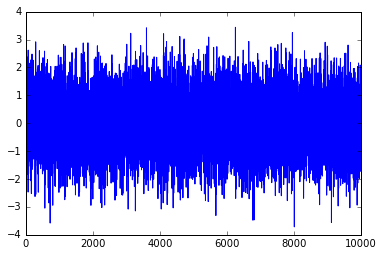

('Encoded ', 20)


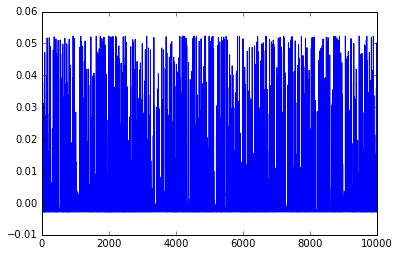

('Encoded ', 10)


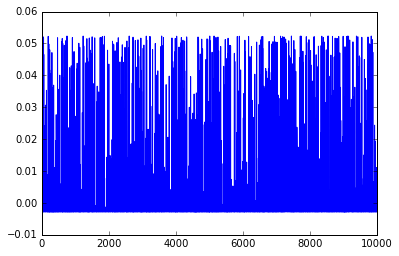

('Encoded ', 'door')


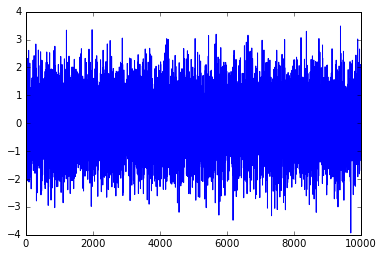

('Encoded ', 80)


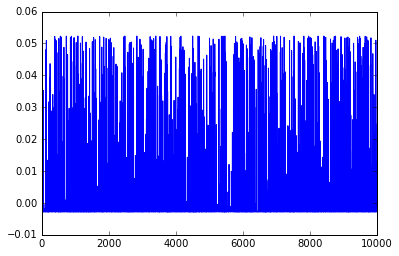

Output:


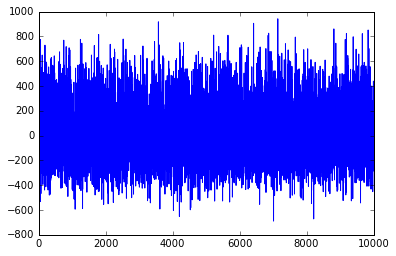

Distance from door is -0.00386697092433
Distance from tree is 0.0327151984239
Output Reverse:


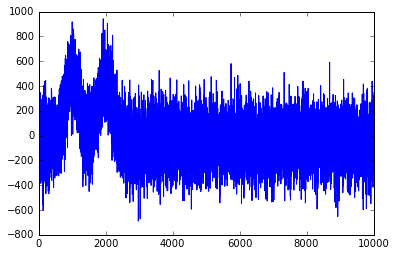

Output Smooth:


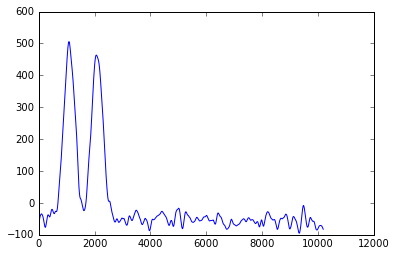

{10: 1, 20: 1}
('Encoded ', 77)


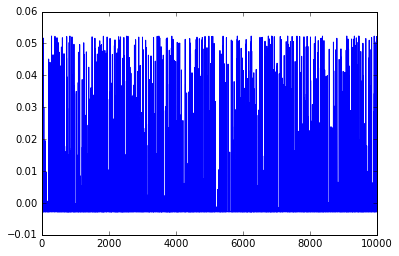

Output:


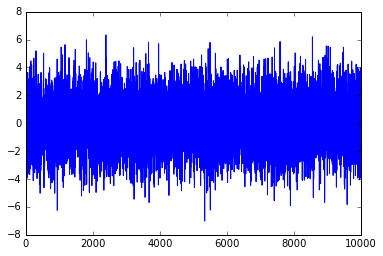

Distance from door is 0.293027136479
Distance from tree is -0.0930141760415
{'door': 0.29302713647881662}


In [2]:
from hrr import HRR
%matplotlib inline 
HRR.set_size(10000)
HRR.reset_kernel()
HRR.input_range = [0,100]
HRR.verbose = True
HRR.stddev = 0.02
HRR.visualize = True

items = [ "tree", "tree", "door" ]
scalars = [20 , 10, 80]

m = None
for i in range(len(items)):
    if m is None:
        m = HRR(items[i]) * scalars[i]
    else:
        new_item = HRR(items[i]) * scalars[i]
        m += new_item
            
#print(m / 0)
#print(m / 49)
#print(m / 83)
print(m / "tree")
print(m / 77)

Binding Capacity Experiment
==================

Maximum number of perfectly accurate bindings.
------------------

Experiment to detect the number of maximum bindings that can be added on top of each other, depending on vector length.

In [1]:
import numpy as np
import random
import string
from hrr import HRR

HRR.reset_kernel()
HRR.verbose = False

it = 50
HRR.set_size(2048)
maxb = 35

while(maxb > 2):

    good = False
    while not good:
        
        good = True
        iterate = 0
        while (iterate < it and good):

            x = np.empty((maxb,2), dtype='|S20')
            for i in range (maxb):
                for j in range(2):
                    x[i][j] = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(10))

            m = None
            for i in range(maxb):
                if m is None:
                    m = HRR(x[i][0]) * x[i][1]
                else:
                    new_item = HRR(x[i][0]) * x[i][1]
                    m += new_item   
                    
            i = 0
            while (i < maxb and good):
                if ((m / x[i][0]) != x[i][1] or (m / x[i][1]) != x[i][0]):
                    good = False               
                i = i + 1

            iterate = iterate + 1
    
        if not good: 
            maxb = maxb - 1
            print(maxb)
        else:
            print("RESULT",HRR.size,maxb)
            HRR.reset_kernel()
            HRR.set_size(HRR.size/2)


/disk/users/lesi/HBP/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
hrr.py:48: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if memory != None:


('RESULT', 2048, 35)
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
('RESULT', 1024, 19)
18
17
16
15
14
13
12
11
('RESULT', 512, 11)
10
9
8
7
6
5
4
('RESULT', 256, 4)
3
2
('RESULT', 128, 2)


Correct Percentage in Range
----------------------
Experiment to detect what correctness percentage different vector sizes have for different numbers of added bindings.

(128, 0, 1.0)
(256, 0, 1.0)
(512, 0, 1.0)
(1024, 0, 1.0)
(2048, 0, 1.0)
(128, 1, 1.0)
(256, 1, 1.0)
(512, 1, 1.0)
(1024, 1, 1.0)
(2048, 1, 1.0)
(128, 2, 1.0)
(256, 2, 1.0)
(512, 2, 1.0)
(1024, 2, 1.0)
(2048, 2, 1.0)
(128, 3, 1.0)
(256, 3, 1.0)
(512, 3, 1.0)
(1024, 3, 1.0)
(2048, 3, 1.0)
(128, 4, 0.99215686274509807)
(256, 4, 1.0)
(512, 4, 1.0)
(1024, 4, 1.0)
(2048, 4, 1.0)
(128, 5, 0.97712418300653592)
(256, 5, 1.0)
(512, 5, 1.0)
(1024, 5, 1.0)
(2048, 5, 1.0)
(128, 6, 0.9551820728291317)
(256, 6, 1.0)
(512, 6, 1.0)
(1024, 6, 1.0)
(2048, 6, 1.0)
(128, 7, 0.90931372549019607)
(256, 7, 0.99509803921568629)
(512, 7, 1.0)
(1024, 7, 1.0)
(2048, 7, 1.0)
(128, 8, 0.82788671023965144)
(256, 8, 0.99564270152505452)
(512, 8, 1.0)
(1024, 8, 1.0)
(2048, 8, 1.0)
(128, 9, 0.81176470588235294)
(256, 9, 0.97647058823529409)
(512, 9, 1.0)
(1024, 9, 1.0)
(2048, 9, 1.0)
(128, 10, 0.73083778966131907)
(256, 10, 0.97147950089126556)
(512, 10, 0.99821746880570406)
(1024, 10, 1.0)
(2048, 10, 1.0)
(128, 11, 0.

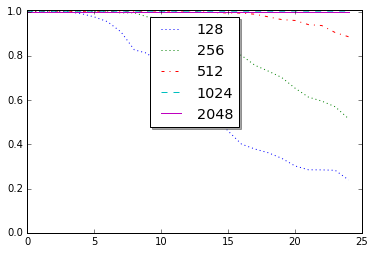

In [5]:
import numpy as np
import random
import string
import pickle
from hrr import HRR
%matplotlib inline 
import legend

HRR.reset_kernel()
HRR.verbose = False

it = 50
steps = 5
maxb = 25
first_size = 128
results = np.empty((steps,maxb), dtype=float)

for bindings in range(maxb):
    HRR.set_size(first_size)
    for step in range(steps):

        miss = 0
        
        for iterate in range(it):
            

            x = np.empty((bindings,2), dtype='|S20')
            for i in range (bindings):
                for j in range(2):
                    x[i][j] = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(10))

            m = None       
            for i in range(bindings):
                if m is None:
                    m = HRR(x[i][0]) * x[i][1]
                else:
                    new_item = HRR(x[i][0]) * x[i][1]
                    m += new_item   
                    
            for i in range(bindings):
                if ((m / x[i][0]) != x[i][1]):
                    miss += 1

        results[step][bindings] = 1.0 - (float(miss) / ((it + 1) * (bindings + 1)))
        print(HRR.size,bindings,results[step][bindings])
        HRR.reset_kernel()
        HRR.set_size(HRR.size*2)
        
legend.getLegend(results,first_size)

Triplet Binding Capacity
=============================
Maximum number of perfectly accurate triplet bindings 
--------------------------
Experiment to detect the number of maximum bindings that can be added on top of each other, depending on vector length.

In [1]:
import numpy as np
import random
import string
from hrr import HRR

HRR.reset_kernel()
HRR.verbose = False

it = 50
HRR.set_size(2048)
maxb = 50

while(maxb > 2):

    good = False
    while not good:
        
        good = True
        iterate = 0
        while (iterate < it and good):

            x = np.empty((maxb,3), dtype='|S20')
            for i in range (maxb):
                for j in range(3):
                    x[i][j] = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(10))

            m = None
            for i in range(maxb):
                if m is None:
                    m = HRR(x[i][0]) * x[i][1] * x[i][2]
                else:
                    new_item = HRR(x[i][0]) * x[i][1] * x[i][2]
                    m += new_item   
                    
            i = 0
            while (i < maxb and good):
                if ((m % x[i][0] / x[i][1]) != x[i][2] 
                or (m % x[i][0] / x[i][2]) != x[i][1] 
                or (m % x[i][1] / x[i][0]) != x[i][2] 
                or (m % x[i][1] / x[i][2]) != x[i][0] 
                or (m % x[i][2] / x[i][0]) != x[i][1] 
                or (m % x[i][2] / x[i][1]) != x[i][0]):
                    good = False               
                i = i + 1

            iterate = iterate + 1
    
        if not good: 
            maxb = maxb - 1
            print(maxb)
        else:
            print("RESULT",HRR.size,maxb)
            HRR.reset_kernel()
            HRR.set_size(HRR.size/2)


/disk/users/lesi/HBP/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
hrr.py:48: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if memory != None:


49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33


KeyboardInterrupt: 

Correct Percentage in Range
-------------------------------
Experiment to detect what correctness percentage different vector sizes have for different numbers of added triplet bindings.

(128, 0, 1.0)
(256, 0, 1.0)
(512, 0, 1.0)
(1024, 0, 1.0)
(2048, 0, 1.0)
(128, 1, 1.0)
(256, 1, 1.0)
(512, 1, 1.0)
(1024, 1, 1.0)
(2048, 1, 1.0)
(128, 2, 1.0)
(256, 2, 1.0)
(512, 2, 1.0)
(1024, 2, 1.0)
(2048, 2, 1.0)
(128, 3, 0.98529411764705888)
(256, 3, 1.0)
(512, 3, 1.0)
(1024, 3, 1.0)
(2048, 3, 1.0)
(128, 4, 0.94509803921568625)
(256, 4, 1.0)
(512, 4, 1.0)
(1024, 4, 1.0)
(2048, 4, 1.0)
(128, 5, 0.94117647058823528)
(256, 5, 0.99673202614379086)
(512, 5, 1.0)
(1024, 5, 1.0)
(2048, 5, 1.0)
(128, 6, 0.8795518207282913)
(256, 6, 0.99439775910364148)
(512, 6, 1.0)
(1024, 6, 1.0)
(2048, 6, 1.0)
(128, 7, 0.81127450980392157)
(256, 7, 0.98284313725490191)
(512, 7, 1.0)
(1024, 7, 1.0)
(2048, 7, 1.0)
(128, 8, 0.75381263616557737)
(256, 8, 0.97385620915032678)
(512, 8, 1.0)
(1024, 8, 1.0)
(2048, 8, 1.0)
(128, 9, 0.65490196078431373)
(256, 9, 0.9509803921568627)
(512, 9, 1.0)
(1024, 9, 1.0)
(2048, 9, 1.0)
(128, 10, 0.64527629233511585)
(256, 10, 0.92335115864527628)
(512, 10, 1.0)
(1024, 10, 1.

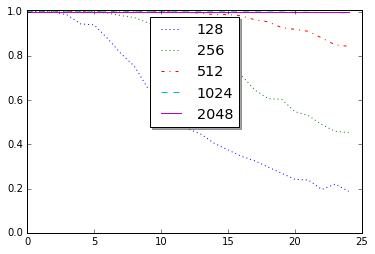

In [2]:
import numpy as np
import random
import string
import pickle
from hrr import HRR
%matplotlib inline 
import legend

HRR.reset_kernel()
HRR.verbose = False

it = 50
steps = 5
maxb = 25
first_size = 128
results = np.empty((steps,maxb), dtype=float)

for bindings in range(maxb):
    HRR.set_size(first_size)
    for step in range(steps):

        miss = 0
        
        for iterate in range(it):
            

            x = np.empty((bindings,3), dtype='|S20')
            for i in range (bindings):
                for j in range(3):
                    x[i][j] = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(10))

            m = None       
            for i in range(bindings):
                if m is None:
                    m = HRR(x[i][0]) * x[i][1] * x[i][2]
                else:
                    new_item = HRR(x[i][0]) * x[i][1] * x[i][2]
                    m += new_item   
                    
            for i in range(bindings):
                if ((m % x[i][0] / x[i][1]) != x[i][2]):
                    miss += 1

        results[step][bindings] = 1.0 - (float(miss) / ((it + 1) * (bindings + 1)))
        print(HRR.size,bindings,results[step][bindings])
        HRR.reset_kernel()
        HRR.set_size(HRR.size*2)
        
legend.getLegend(results,first_size)

Scalar Binding Capacity
=============================
Maximum number of perfectly accurate scalar bindings 
--------------------------
Experiment to detect the number of maximum bindings that can be added on top of each other, depending on vector length.


In [2]:
import numpy as np
import random
import string
from hrr import HRR

HRR.reset_kernel()
HRR.verbose = False

it = 50
HRR.set_size(2048)
maxb = 40

while(maxb > 2):

    good = False
    while not good:
        
        good = True
        iterate = 0
        while (iterate < it and good):

            x = np.empty((maxb,2), dtype=float)
            for i in range (maxb):
                for j in range(2):
                    x[i][j] = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(10))

            m = None
            for i in range(maxb):
                if m is None:
                    m = HRR(x[i][0]) * x[i][1]
                else:
                    new_item = HRR(x[i][0]) * x[i][1]
                    m += new_item   
                    
            i = 0
            while (i < maxb and good):
                if ((m / x[i][0]) != x[i][1]):
                    good = False               
                i = i + 1

            iterate = iterate + 1
    
        if not good: 
            maxb = maxb - 1
            print(maxb)
        else:
            print("RESULT",HRR.size,maxb)
            HRR.reset_kernel()
            HRR.set_size(HRR.size/2)

ValueError: could not convert string to float: Z8CYFVEO9P

Correct Percentage in Range
-------------------------------
Experiment to detect what correctness percentage different vector sizes have for different numbers of added scalar bindings.

In [1]:
import numpy as np
import random
import string
from hrr import HRR

input_range = 10000

HRR.reset_kernel()
HRR.input_range = input_range
HRR.verbose = False

it = 50
HRR.set_size(2048)
maxb = 40

while(maxb > 2):

    good = False
    while not good:
        
        good = True
        iterate = 0
        while (iterate < it and good):

            x = np.empty((maxb,2), dtype=float)
            for i in range (maxb):
                for j in range(2):
                    x[i][j] = random.randrange(input_range)

            m = None
            for i in range(maxb):
                if m is None:
                    m = HRR(x[i][0]) * x[i][1]
                else:
                    new_item = HRR(x[i][0]) * x[i][1]
                    m += new_item   
                    
            i = 0
            while (i < maxb and good):
                if ((m / x[i][0]) != x[i][1]):
                    good = False               
                i = i + 1

            iterate = iterate + 1
    
        if not good: 
            maxb = maxb - 1
            print(maxb)
        else:
            print("RESULT",HRR.size,maxb)
            HRR.reset_kernel()
            HRR.set_size(HRR.size/2)


/disk/users/lesi/HBP/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
hrr.py:48: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if memory != None:


TypeError: 'int' object has no attribute '__getitem__'